<a href="https://colab.research.google.com/github/abaskon/LiteratureReviewRobotics/blob/main/Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/abaskon/LiteratureReviewRobotics.git

Cloning into 'LiteratureReviewRobotics'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 96 (delta 35), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (96/96), done.
Checking out files: 100% (22/22), done.


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2010.csv')
df_2 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2011.csv')
df_3 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2012.csv')
df_4 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2013.csv')
df_5 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2014.csv')
df_6 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2015.csv')
df_7 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2016.csv')
df_8 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2017.csv')
df_9 = pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2018.csv')
df_10 =pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2019.csv')
df_11 =pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/CSV_Files/2020.csv')


data = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11], axis = 0)

data = data.drop_duplicates(keep = False)
print(' Entries:', len(data), '\n', data.columns)

data.drop(['Abstract', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'Funding Text 4', 'Correspondence Address', 'Editors', 'Sponsors', 'ISSN', 'ISBN', 'CODEN',],axis=1,inplace=True)

 Entries: 21707 
 Index(['Unnamed: 0', 'Authors', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations',
       'Authors with affiliations', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Molecular Sequence Numbers', 'Chemicals/CAS',
       'Tradenames', 'Manufacturers', 'Funding Details', 'Funding Text 1',
       'Funding Text 2', 'Funding Text 3', 'Funding Text 4', 'Funding Text 5',
       'Funding Text 6', 'References', 'Correspondence Address', 'Editors',
       'Sponsors', 'Publisher', 'Conference name', 'Conference date',
       'Conference location', 'Conference code', 'ISSN', 'ISBN', 'CODEN',
       'PubMed ID', 'Language of Original Document',
       'Abbreviated Source Title', 'Document Type', 'Publication Stage',
       'Open Access', 'Source', 'EID', 'Unnamed: 46', 'Unnamed: 45',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
data =pd.read_csv('https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/csv/YvD.csv')


In [5]:
data.head(1)

,Year,Documents,Cumulative
0,1993,3458,3458


In [ ]:
# Heat Map

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("rows.csv")

year = ['2011', '2012', '2013','2014','2015','2016','2017','2018','2019','2020','2021']
plt.subplots(figsize=(30,40))
ax =sns.heatmap(df.transpose(),annot=True)
plt.savefig("test.svg", format="svg")

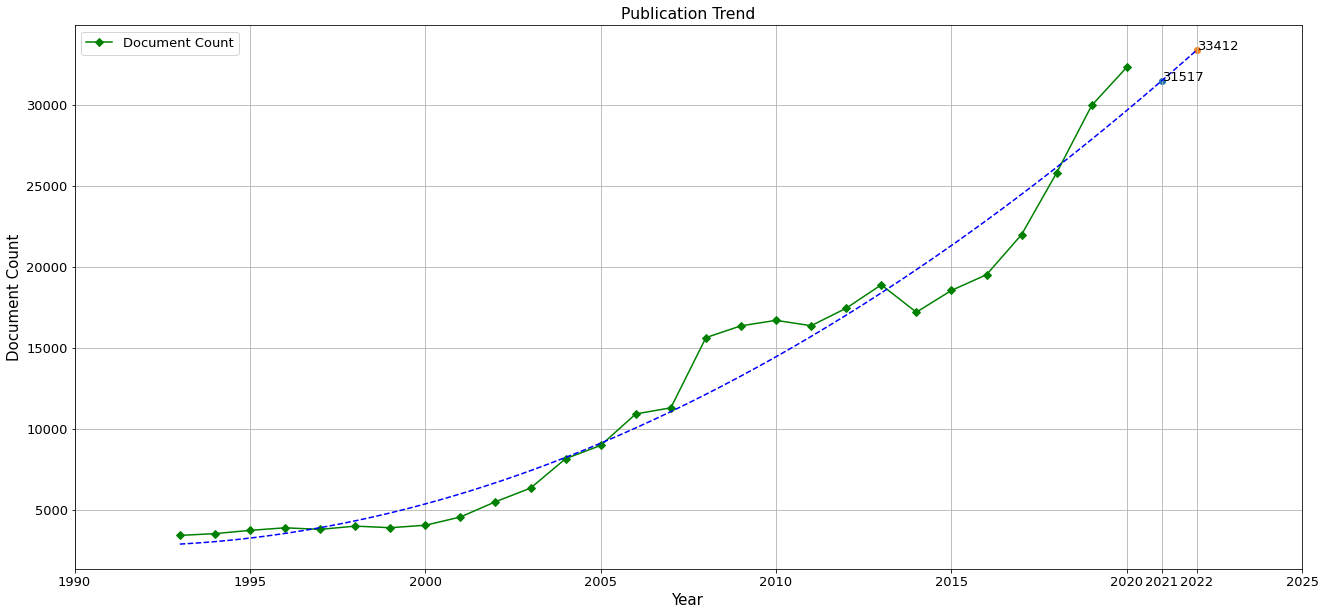

In [28]:

font = {'family' : 'normal',
       # 'weight' : 'bold',
        'size'   : 13}



plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(22,10))
#ax2 = ax.twinx()
ax.set_zorder(10)
ax.patch.set_visible(False)

ax.set_title('Publication Trend')
ax.set_xlabel('Year' ,fontsize =15)

ax.plot(data['Year'], data['Documents'], color='green', marker='D')
#ax2.plot(data['Year'], data['Cumulative'], color='#ADD8E6', marker='|')

ax.set_ylabel('Document Count' , fontsize =15)
#ax2.set_ylabel('Cumulative Count')
ax.legend(['Document Count'],loc='upper left')
#ax2.legend(['Cumulative Count'], loc='upper center')

# Train Algorithm (Polynomial)
degree = 3
poly_fit = np.poly1d(np.polyfit(data.Year,data.Documents, degree))

# Plot data
xx = np.linspace(1993, 2022, 1000)
ax.plot(xx, poly_fit(xx), c='blue',linestyle='--')

p21= round(poly_fit(2021))
p22=round(poly_fit(2022))


ax.scatter(2021, p21)
ax.scatter(2022, p22)
ax.text(x=2021,y=p21,s=str(p21))
ax.text(x=2022,y=p22,s=str(p22))
plt.xticks(list(plt.xticks()[0]) + [2021,2022])
ax.grid(True)

plt.show()


In [5]:
MRS = pd.read_csv("https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/csv/Most_Relevant_Sources.csv")

In [6]:
MRS['Source'] = MRS['Sources'].str.slice(0, 50)
MRS.head(2)

,Sources,Articles,Source
0,PROCEEDINGS - IEEE INTERNATIONAL CONFERENCE ON...,1612,PROCEEDINGS - IEEE INTERNATIONAL CONFERENCE ON...
1,IEEE INTERNATIONAL CONFERENCE ON INTELLIGENT R...,1085,IEEE INTERNATIONAL CONFERENCE ON INTELLIGENT R...


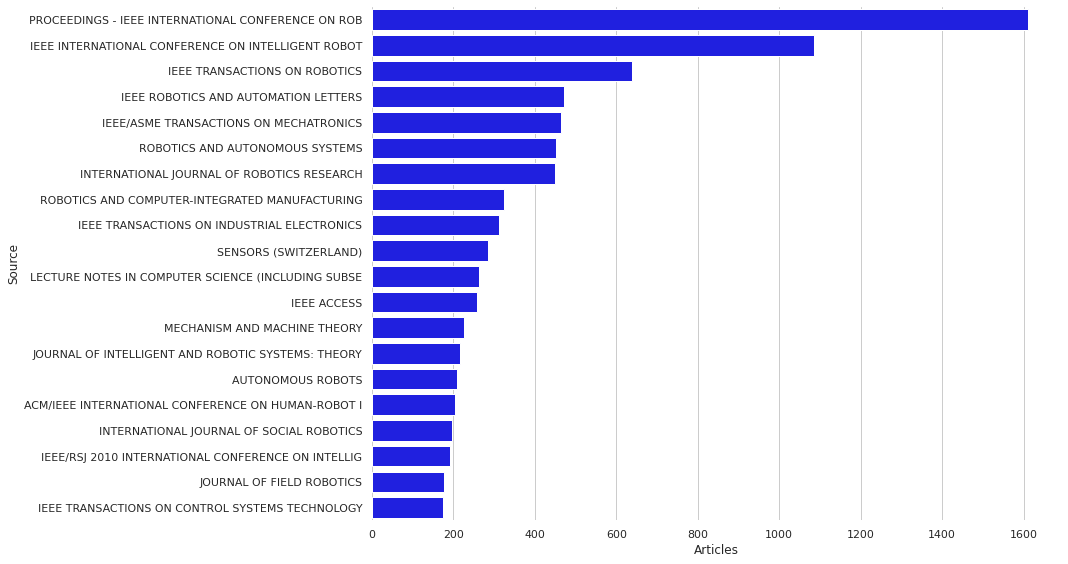

In [8]:

plt.figure(figsize=(15,8))

sns.set(style="darkgrid")


sns.set_theme(style="whitegrid")
sns.barplot(x="Articles",y = "Source", data=MRS,color ='#0000FF' )

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [4]:
CC = pd.read_csv("https://raw.githubusercontent.com/abaskon/LiteratureReviewRobotics/main/csv/Country_Contribution.csv")

import plotly.express as px

fig = px.pie(CC, values='Document Count', names='Country', title='Country Comtribution')

fig.show()